# Batting Stats in IPL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, glob, yaml, pickle
import datetime

from utils import get_player_profile

data_dir= '../database/01_t20s/'

In [3]:
df = pickle.load(open(data_dir+'batting.df', 'rb'))
df.head(2)

,batsman,0s,1s,2s,3s,4s,5s,6s,7s,Runs,...,NO,Team,Against,Tied,Win,Toss,team-total,season,date,match-id
0,AC Gilchrist,3,1,0,0,0,0,0,0,1,...,False,Australia,New Zealand,False,True,True,214,2005,2005-02-17,211048
1,MJ Clarke,2,1,0,0,0,0,1,0,7,...,False,Australia,New Zealand,False,True,True,214,2005,2005-02-17,211048


In [7]:
def consistency_(th_runs=30, min_runs=1000):
    df = pickle.load(open(data_dir+'batting.df', 'rb'))
    all_players = df['batsman'].unique()
    
    data=[]
    for player in all_players:
        dfp     = df[ df['batsman'] == player ]
        Inns_   = dfp.shape[0]
        Runs_   = dfp.Runs.sum()
        BF_     = dfp.BF.sum()
        Inns_th = dfp[dfp['Runs'] >= th_runs].shape[0]
        
        if (Runs_ >= min_runs):
            th_plus = dfp[dfp['Runs'] >= th_runs]['Runs'].shape[0]
            Runs_th = dfp[dfp['Runs'] >= th_runs]['Runs'].sum()
            
            mu_R      = np.mean(dfp['Runs'])
            sigma_R   = np.std(dfp['Runs'])
            sigma_mu_R= sigma_R/mu_R

            mu_B      = np.mean(dfp['BF'])
            sigma_B   = np.std(dfp['BF'])
            sigma_mu_B= sigma_B/mu_B
            
            RpI     = Runs_/Inns_ 
            BpI     = BF_/Inns_
            data.append([player, Inns_, Inns_th, Runs_, Runs_th, BF_, th_plus, RpI, BpI, mu_R, sigma_R, sigma_mu_R,
                         mu_B, sigma_B, sigma_mu_B])

    df_ = pd.DataFrame( data, columns=[ 'player', 'Innings', 'Innings_th', 'Runs', 'Runs_th', 'BF',
                                       'Th_plus', 'RpI', 'BpI', 'mu_R', 'sigma_R', 'sigma_ov_mu_R',
                                       'mu_B', 'sigma_B', 'sigma_ov_mu_B' ])
    df_['name_and_thplus'] = df_['player']+" ("+df_['Th_plus'].astype(str)+")"
    df_sorted  = df_.sort_values(by=['RpI'], ascending=False)

    return df_sorted

dfc=consistency_()
dfc

,player,Innings,Innings_th,Runs,Runs_th,BF,Th_plus,RpI,BpI,mu_R,sigma_R,sigma_ov_mu_R,mu_B,sigma_B,sigma_ov_mu_B,name_and_thplus
59,DJ Malan,24,13,1003,821,695,13,41.791667,28.958333,41.791667,27.380010,0.655155,28.958333,12.798044,0.441947,DJ Malan (13)
58,Babar Azam,45,26,1730,1471,1328,26,38.444444,29.511111,38.444444,25.760051,0.670059,29.511111,16.638139,0.563792,Babar Azam (26)
42,V Kohli,84,42,3159,2523,2272,42,37.607143,27.047619,37.607143,26.578732,0.706747,27.047619,16.357541,0.604768,V Kohli (42)
57,KL Rahul,45,20,1557,1228,1095,20,34.600000,24.333333,34.600000,28.431125,0.821709,24.333333,15.473274,0.635888,KL Rahul (20)
43,AJ Finch,71,36,2346,2045,1542,36,33.042254,21.718310,33.042254,32.727400,0.990471,21.718310,16.530964,0.761153,AJ Finch (36)
1,KP Pietersen,36,19,1176,914,831,19,32.666667,23.083333,32.666667,19.768100,0.605146,23.083333,12.921504,0.559776,KP Pietersen (19)
37,Mohammad Shahzad,59,26,1830,1425,1327,26,31.016949,22.491525,31.016949,25.866995,0.833963,22.491525,16.277647,0.723724,Mohammad Shahzad (26)
0,BB McCullum,70,28,2140,1600,1571,28,30.571429,22.442857,30.571429,26.950522,0.881559,22.442857,15.665828,0.698032,BB McCullum (28)
50,F du Plessis,50,19,1528,1089,1137,19,30.560000,22.740000,30.560000,25.847367,0.845791,22.740000,15.620256,0.686907,F du Plessis (19)
31,MJ Guptill,95,43,2839,2299,2084,43,29.884211,21.936842,29.884211,26.185920,0.876246,21.936842,15.627109,0.712368,MJ Guptill (43)


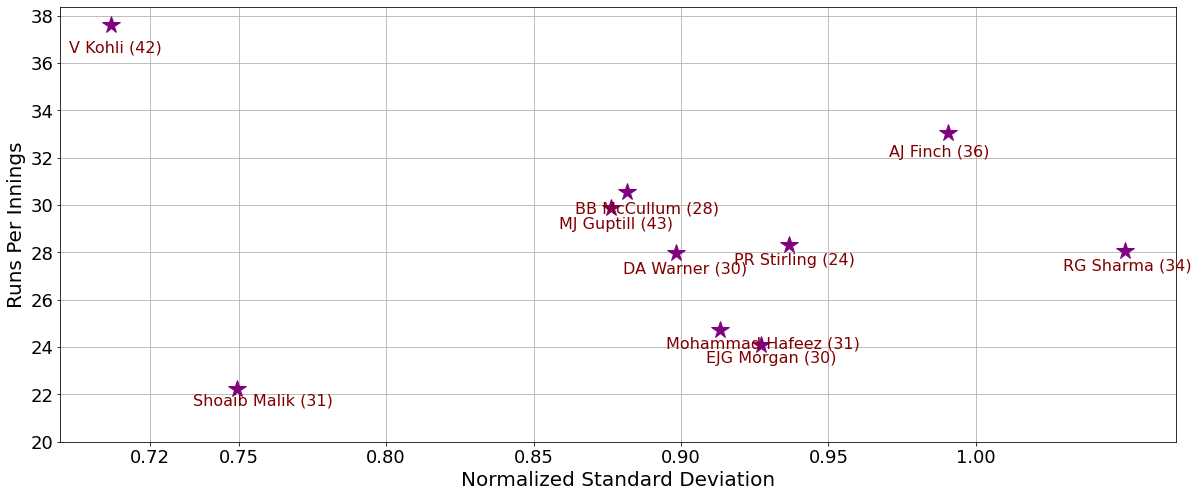

In [10]:
def Plot_sigma_mu():
    df_c=consistency_(th_runs=30, min_runs=2000)
    plt.figure(figsize=(20, 8))
    plt.plot(df_c['sigma_ov_mu_R'], df_c['mu_R'], '*', markersize=18, color='purple')
    for i in range(df_c.shape[0]):
        plt.text(0.98*df_c['sigma_ov_mu_R'][i], 0.97*df_c['mu_R'][i], df_c['name_and_thplus'][i], fontsize=16, color='maroon')
    plt.xticks([0.72, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], fontsize=18);
    plt.yticks([20, 22, 24, 26, 28, 30, 32, 34, 36, 38], fontsize=18);
    plt.xlabel('Normalized Standard Deviation', fontsize=20)
    plt.ylabel('Runs Per Innings',   fontsize=20)
    plt.grid()
Plot_sigma_mu()

## strike rate (SR) consistency

In [7]:
player='SK Raina'
dfs=get_player_profile(player)
dfs

,season,Team,Innings,NO,Runs,BF,HS,Ave,SR,50s,100s,4s,6s
0,2008,Chennai Super Kings,14,3,421,295,55,38.27,142.71,3,0,35,18
1,2009,Chennai Super Kings,14,0,434,308,98,31.00,140.91,2,0,37,21
2,2010,Chennai Super Kings,16,5,520,364,83,47.27,142.86,4,0,45,22
3,2011,Chennai Super Kings,16,2,438,325,73,31.29,134.77,4,0,36,17
4,2012,Chennai Super Kings,18,1,441,325,73,25.94,135.69,1,0,36,19
5,2013,Chennai Super Kings,17,4,548,365,100,42.15,150.14,4,1,50,18
6,2014,Chennai Super Kings,16,3,523,359,87,40.23,145.68,5,0,51,19
7,2015,Chennai Super Kings,17,2,374,304,62,24.93,123.03,2,0,31,16
8,2016,Gujarat Lions,15,1,399,312,75,28.50,127.88,3,0,39,10
9,2017,Gujarat Lions,14,3,442,307,84,40.18,143.97,3,0,42,13
